In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pingouin as pg
from scipy.stats import ranksums
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind


run = 4


folder = "../../results_all/app_AA-test_influxdb/"
filename = "../../results_all/app_AA-test_influxdb/app_AA-test_influxdb_run" + str(run) + ".csv"
#filename = "../../results_all/app_AA-test_influxdb/app_AA-test_influxdb.csv"

In [2]:
print("start...")
df_latencies = pd.read_csv(filename)
print("done.")

start...
done.


In [3]:
inserts= df_latencies.loc[df_latencies['type'] == 'inserts']
queries1= df_latencies.loc[df_latencies['type'] == 'simple queries']
queries2= df_latencies.loc[df_latencies['type'] == 'group-by queries']

In [4]:
def ranks(data):
    a = data.loc[data['version'] == 'base']['latency (ms)']
    b = data.loc[data['version'] == 'variation']['latency (ms)']
    print(ranksums(a,b))
    #print(wilcoxon(a, b, "zsplit", correction=True, mode="approx"))
    #print(ttest_ind(a,b))
    #print(pg.ttest(x=a, y=b, correction=True).round(3))



In [5]:
ranks(inserts)


RanksumsResult(statistic=2.2622581809243445, pvalue=0.02368145654403876)


In [6]:
ranks(queries1)

RanksumsResult(statistic=-1.2213531904522341, pvalue=0.22195232226954287)


In [7]:
ranks(queries2)


RanksumsResult(statistic=-2.85340417154382, pvalue=0.004325357099804508)


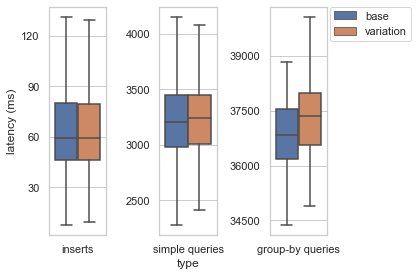

In [8]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 3)

a1 = sns.boxplot(y="latency (ms)", x= "type", data=inserts,  orient='v' , ax=axes[0], showfliers=False, hue="version")
a2 = sns.boxplot(y="latency (ms)", x= "type", data=queries1,  orient='v' , ax=axes[1], showfliers=False, hue="version")
a3 = sns.boxplot(y="latency (ms)", x= "type", data=queries2,  orient='v' , ax=axes[2], showfliers=False, hue="version")

a1.get_legend().remove()
a1.set(xlabel=None)
a1.yaxis.set_major_locator(MaxNLocator(5))

a2.get_legend().remove()
a2.set(ylabel=None)
a2.yaxis.set_major_locator(MaxNLocator(5))

a3.get_legend().remove()
a3.set(xlabel=None)
a3.set(ylabel=None)
a3.yaxis.set_major_locator(MaxNLocator(5))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.figlegend(loc='lower right',bbox_to_anchor=(0.85,0.25))


plt.tight_layout()
plt.show()

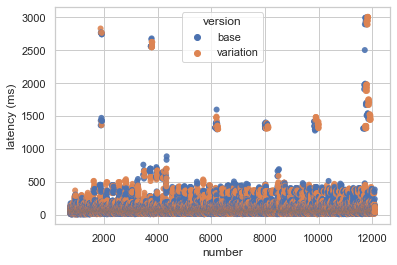

In [9]:
#sns.scatterplot(data=inserts, x="number", y="latency (ms)", hue="version", alpha=0.9,  style='version', markers=['*d', 's'])
sns.scatterplot(data=inserts, x="number", y="latency (ms)", hue="version", alpha=0.9,  markers='d', linewidth=0)
plt.show()

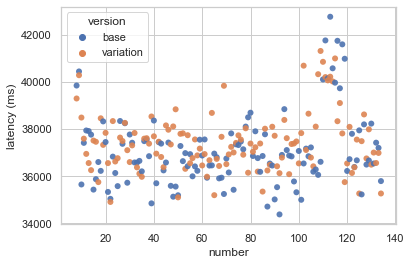

In [10]:
sns.scatterplot(data=queries2, x="number", y="latency (ms)", hue="version", alpha=0.9,  markers='d', linewidth=0)
plt.show()